In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv('demographic.csv')
df = df.drop('index', axis=1)
df

/tmp/ipykernel_10221/466465776.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('demographic.csv')


,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
0,0,26,1,08/04/2018 14:50,2535,3000000,1,51,4,2,...,0,66,"{""device_codename"": ""HM2014817"", ""brand"": ""Xia...","{""percent_incoming_nighttime"": 1.83, ""percent_...",id,"['com.google.android.music', 'com.facebook.orc...",male,11/23/1991,2017-12-21T04:38:00+0000,Married
1,0,22,1,02/01/2018 17:17,685,4000000,1,28,4,4,...,0,69,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.google.android.instantapps.supervisor', ...",male,01/20/1995,2017-11-25T17:23:09+0000,NaN
2,1,32,1,01/01/2018 16:39,1765,7000000,1,35,4,4,...,2,315,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 6.65, ""percent_...",id,"['com.tencent.ibg.joox', 'com.mrgames.larvaact...",male,10/13/1985,2017-12-23T18:05:57+0000,Married
3,0,31,2,04/01/2018 22:36,407,20000000,3,37,4,3,...,2,84,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.kfit.fave', 'app.bpjs.mobile', 'com.redd...",female,07/27/1986,2017-12-05T09:37:19+0000,Married
4,0,27,1,02/01/2018 18:12,3064,3000000,1,36,4,3,...,0,0,"{""device_codename"": ""1609"", ""brand"": ""vivo""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.lenovo.anyshare.gps', 'com.UCMobile.intl...",male,07/05/1990,2017-12-03T09:09:48+0000,In a relationship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41017,0,27,2,11/07/2018 22:23,997,5000000,2,51,4,2,...,2,1026,"{""device_codename"": ""A1601"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 5.66, ""percent_...",id,"['com.instagram.android', 'com.google.android....",NaN,NaN,NaN,NaN
41018,0,26,1,11/07/2018 20:28,955,3000000,2,24,4,2,...,0,0,"{""device_codename"": ""nikel"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 10.71, ""percent...",id,"['com.youmusic.magictiles', 'com.ayopop', 'com...",NaN,NaN,NaN,NaN
41019,0,22,2,11/07/2018 23:33,881,3000000,1,9,4,4,...,0,272,"{""device_codename"": ""a33g"", ""brand"": ""samsung""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.grabtaxi.passenger', 'jp.co.translimit.b...",female,10/02/1995,2017-10-25T08:05:13+0000,NaN
41020,0,29,2,11/07/2018 22:03,540,6000000,1,51,4,2,...,0,0,"{""device_codename"": ""santoni"", ""brand"": ""Xiaomi""}","{""percent_incoming_nighttime"": 1.27, ""percent_...",id,"['cn.wps.moffice_eng', 'com.vuclip.viu', 'com....",NaN,NaN,NaN,NaN


We have 20 features with flag_bad as the target label

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41022 entries, 0 to 41021
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   flag_bad                41022 non-null  int64 
 1   de_age                  41022 non-null  int64 
 2   de_gender               41022 non-null  int64 
 3   de_date_joined          41022 non-null  object
 4   de_num_friends          41022 non-null  int64 
 5   de_monthly_salary       41022 non-null  int64 
 6   de_employment_type      41022 non-null  int64 
 7   de_employment_duration  41022 non-null  int64 
 8   de_accomodation_type    41022 non-null  int64 
 9   de_education            41022 non-null  int64 
 10  de_marital_status       41022 non-null  int64 
 11  de_children             41022 non-null  int64 
 12  ph_total_contacts       41022 non-null  int64 
 13  ph_other_device_info    41022 non-null  object
 14  ph_call_log_stats       38935 non-null  object
 15  ph

Null analysis shows several column has null values (by fraction/percentage)

In [4]:
df.isna().sum()/len(df)

flag_bad                  0.000000
de_age                    0.000000
de_gender                 0.000000
de_date_joined            0.000000
de_num_friends            0.000000
de_monthly_salary         0.000000
de_employment_type        0.000000
de_employment_duration    0.000000
de_accomodation_type      0.000000
de_education              0.000000
de_marital_status         0.000000
de_children               0.000000
ph_total_contacts         0.000000
ph_other_device_info      0.000000
ph_call_log_stats         0.050875
ph_country_code           0.000609
ph_app_list               0.000000
fb_gender                 0.036883
fb_dob                    0.235313
fb_last_updated_date      0.035834
fb_relation               0.645044
dtype: float64

Balanceness of data shown that we have ~13% bad label

In [5]:
df.flag_bad.value_counts()/len(df)

flag_bad
0    0.870313
1    0.129687
Name: count, dtype: float64

Accomodation type can't be used as it only have single value: 4

In [6]:
df.de_accomodation_type.value_counts(dropna=False)

de_accomodation_type
4    41022
Name: count, dtype: int64

The country code label is very unbalanced, we may not use this as the feature for modelling but we can use this for visualization

In [7]:
df.ph_country_code.value_counts(dropna=False)

ph_country_code
id     40984
NaN       25
us         3
sg         3
my         2
jp         2
tw         1
kh         1
th         1
Name: count, dtype: int64

Based on these:

1. We will use precision and recall as the metrics considering this as the unbalanced study case
2. There are several column we need to treat, but we can label it as unstated also and see the result
3. We need to clean data

In [8]:
df.de_employment_type.value_counts()

de_employment_type
1    29566
2     6621
3     4833
4        2
Name: count, dtype: int64

We need to assign category 4, lets say to category 3, because there's no category 4 based on documentation

In [9]:
df.de_employment_type = df.de_employment_type.replace(4,3)

# Visualization & Exploration

### Country Code

I suspect non-indonesian country code can sign fraud/bad, but let's see.

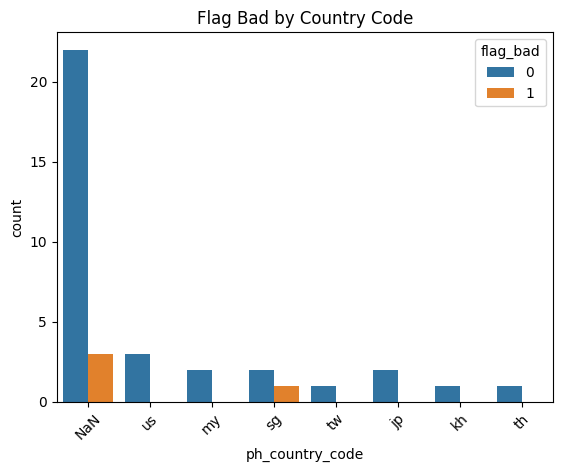

In [10]:
# Countplot with hue
sns.countplot(data=df[df.ph_country_code!='id'].fillna('NaN'), x='ph_country_code', hue='flag_bad')

plt.title("Flag Bad by Country Code")
plt.xticks(rotation=45)
plt.show()

In [11]:
df[df.ph_country_code!='id'].flag_bad.mean()

np.float64(0.10526315789473684)

In [12]:
df[df.ph_country_code=='id'].flag_bad.mean()

np.float64(0.129709154792114)

Not really. not much see difference.

### Inconsistent Gender

Inconsistent gender can indicate something.

In [13]:
a = (df.de_gender.replace({1:'male', 2:'female'})==df.fb_gender).where(df.fb_gender.notna())
df[a.fillna(True)==False].head()

,flag_bad,de_age,de_gender,de_date_joined,de_num_friends,de_monthly_salary,de_employment_type,de_employment_duration,de_accomodation_type,de_education,...,de_children,ph_total_contacts,ph_other_device_info,ph_call_log_stats,ph_country_code,ph_app_list,fb_gender,fb_dob,fb_last_updated_date,fb_relation
19,0,31,1,05/01/2018 19:08,456,4000000,1,27,4,2,...,0,0,"{""device_codename"": ""1606"", ""brand"": ""vivo""}","{""percent_incoming_nighttime"": 6.45, ""percent_...",id,"['com.TanApps.FindTheDifferences300', 'com.kin...",female,10/15/1986,2017-12-01T10:32:20+0000,Single
24,0,24,1,01/01/2018 12:25,174,4000000,1,24,4,4,...,0,0,"{""device_codename"": ""on5xelte"", ""brand"": ""sams...","{""percent_incoming_nighttime"": 6.06, ""percent_...",id,"['com.google.android.apps.translate', 'com.sho...",female,06/13/1993,2017-10-14T15:36:29+0000,Single
48,0,27,1,01/01/2018 13:45,4964,4000000,2,51,4,2,...,1,0,"{""device_codename"": ""XT1663"", ""brand"": ""motoro...","{""percent_incoming_nighttime"": 1.92, ""percent_...",id,"['com.bca', 'com.shopback.app', 'ovo.id', 'com...",female,01/26/1988,2017-12-29T11:48:23+0000,NaN
98,0,25,1,03/03/2018 11:45,1171,4000000,1,6,4,3,...,0,639,"{""device_codename"": ""iPhone6,1"", ""brand"": ""App...",NaN,id,[],female,03/22/1992,2017-06-06T09:27:16+0000,In a domestic partnership
161,0,26,1,02/01/2018 23:30,1663,5000000,1,25,4,3,...,2,206,"{""device_codename"": ""A37f"", ""brand"": ""OPPO""}","{""percent_incoming_nighttime"": 0.0, ""percent_o...",id,"['com.grabtaxi.passenger', 'com.gta.real.gangs...",female,04/06/1994,2017-12-17T04:43:37+0000,In a relationship


In [14]:
len(df[a.fillna(True)==False])

758

People that having gender difference in FB weights 1 more at:

In [15]:
df[a.fillna(True)==False].flag_bad.mean()

np.float64(0.20976253298153033)

While for conistent person

In [16]:
df[a.fillna(True)].flag_bad.mean()

np.float64(0.12817901847804491)

And person dont fill the facebook gender

In [17]:
df[a.isna()].flag_bad.mean()

np.float64(0.10046265697290152)

This is a clear difference

### Gender

In [18]:
df[['de_gender', 'flag_bad']].value_counts()

de_gender  flag_bad
1          0           21574
2          0           14128
1          1            3512
2          1            1808
Name: count, dtype: int64

In [19]:
df[df.de_gender==1].flag_bad.mean()

np.float64(0.13999840548513115)

In [20]:
df[df.de_gender==2].flag_bad.mean()

np.float64(0.11345381526104417)

In [21]:
df[['fb_gender', 'flag_bad']].value_counts()

fb_gender  flag_bad
male       0           20607
female     0           13734
male       1            3406
female     1            1762
Name: count, dtype: int64

In [22]:
df[df.fb_gender=='male'].flag_bad.mean()

np.float64(0.141839836755091)

In [23]:
df[df.fb_gender=='female'].flag_bad.mean()

np.float64(0.11370676303562209)

Male tends to have more bad flag, but we need to be inclusive to all gender, so we drop this pure-gender feature. Moreover the difference is not really significant like inconsistent gender we found before.

### Num Friends

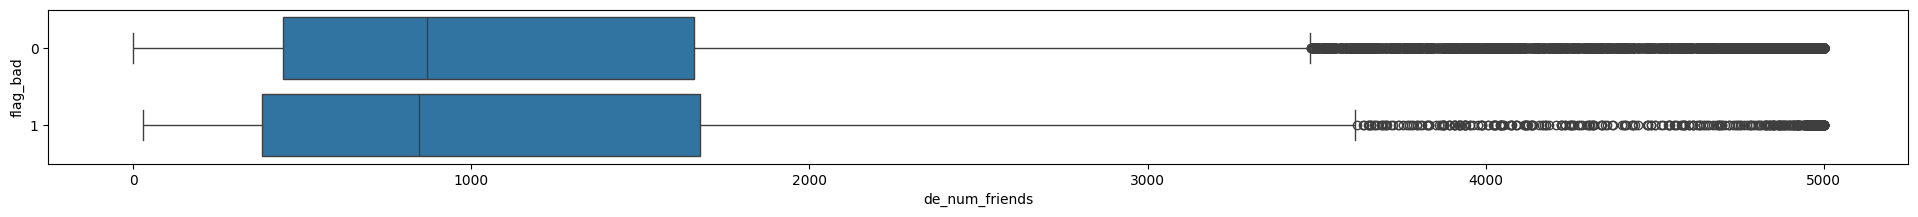

In [24]:
fig, ax = plt.subplots(figsize=(24,2))
sns.boxplot(df[['de_num_friends', 'flag_bad']], x='de_num_friends', y='flag_bad', orient='h');

Although having some outliers, its OK for model that can handle outliers like xgboost.

### Monthly Salary

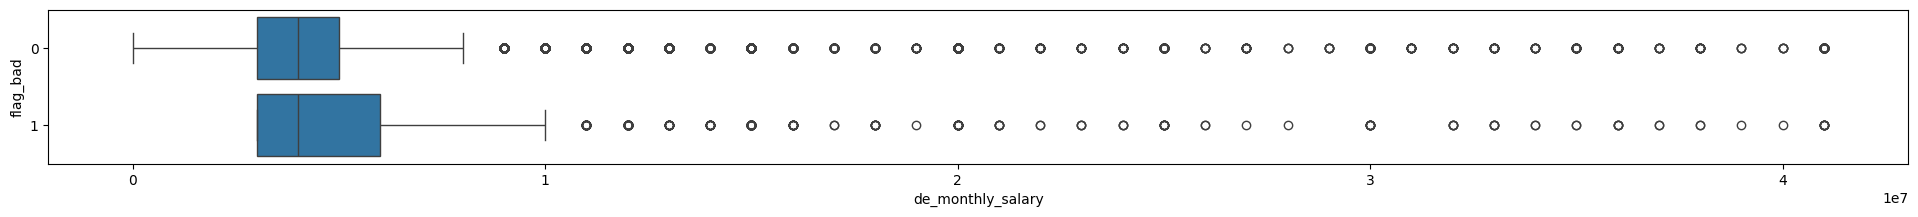

In [25]:
fig, ax = plt.subplots(figsize=(24,2))
sns.boxplot(df[['de_monthly_salary', 'flag_bad']], x='de_monthly_salary', y='flag_bad', orient='h');

Still make sense and trees model can handle outlier

### Marital Status

In [26]:
df.de_marital_status.value_counts()

de_marital_status
1    20154
2    20020
3      500
4      348
Name: count, dtype: int64

In [27]:
df.groupby("de_marital_status")["flag_bad"].mean()

de_marital_status
1    0.129503
2    0.126024
3    0.196000
4    0.255747
Name: flag_bad, dtype: float64

Widower tend to have more bad flag

### Employment Type

In [28]:
df.de_employment_type.value_counts()

de_employment_type
1    29566
2     6621
3     4835
Name: count, dtype: int64

In [29]:
df.groupby("de_employment_type")["flag_bad"].mean()

de_employment_type
1    0.118379
2    0.157227
3    0.161117
Name: flag_bad, dtype: float64

Not really different for employment type

### Children

In [30]:
df.de_children.value_counts()

de_children
0    23095
1     8921
2     7249
3     1446
4      311
Name: count, dtype: int64

In [31]:
df.groupby("de_children")["flag_bad"].mean()

de_children
0    0.127127
1    0.125659
2    0.138088
3    0.139696
4    0.192926
Name: flag_bad, dtype: float64

The trend is clear. More kids, the flag bad percentage is higher.

### Education

In [32]:
df.de_education.value_counts()

de_education
2    24589
4     8258
3     5758
5     1561
1      856
Name: count, dtype: int64

In [33]:
df.groupby("de_education")["flag_bad"].mean()

de_education
1    0.169393
2    0.146244
3    0.116013
4    0.099055
5    0.059577
Name: flag_bad, dtype: float64

The trend is clear. The higher the education, the lesser the bad flag.

### Employment Duration

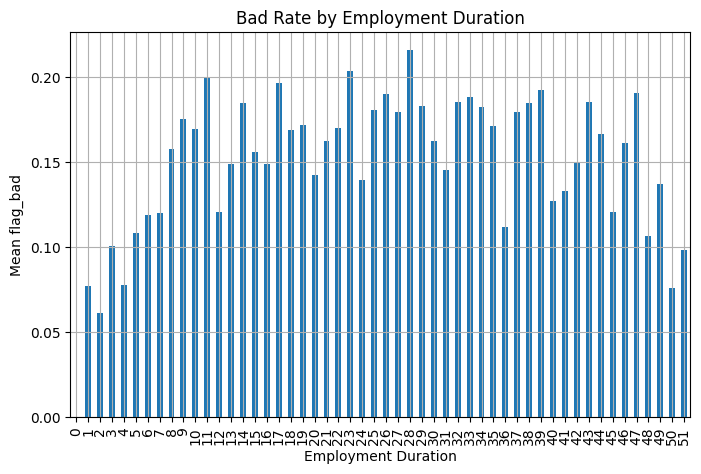

In [34]:
df.groupby("de_employment_duration")["flag_bad"].mean().plot(
    kind="bar", figsize=(8,5), ylabel="Mean flag_bad", xlabel="Employment Duration", title="Bad Rate by Employment Duration"
)
plt.grid()

Unclear relation, mostly not really different

### Total Contacts

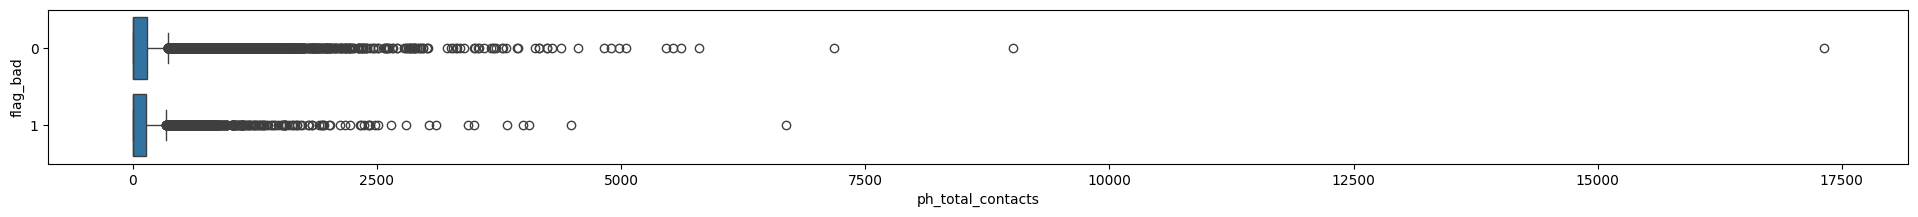

In [35]:
fig, ax = plt.subplots(figsize=(24,2))
sns.boxplot(df[['ph_total_contacts', 'flag_bad']], x='ph_total_contacts', y='flag_bad', orient='h');

We should clear the outlier and see the pattern, but lets just handle it over xgboost that robust to outliers

### Age Confirmation vs FB Age

This is the fb_age assume its counted at joined date

In [36]:
((pd.to_datetime(df.de_date_joined, dayfirst=True) - pd.to_datetime(df.fb_dob))/pd.Timedelta(days=1))/365

0        26.393474
1        22.969096
2        32.242997
3        31.465594
4        27.517146
           ...    
41017          NaN
41018          NaN
41019    22.791729
41020          NaN
41021    34.725967
Length: 41022, dtype: float64

In [37]:
(((pd.to_datetime(df.de_date_joined, dayfirst=True) - pd.to_datetime(df.fb_dob))/pd.Timedelta(days=1))/365).describe()

count    31369.000000
mean        29.359470
std          9.984007
min         13.492192
25%         23.824612
50%         27.309433
75%         32.209488
max        113.547666
dtype: float64

And lets see the discrepancies with the de_age

In [37]:
a = (((pd.to_datetime(df.de_date_joined, dayfirst=True) - pd.to_datetime(df.fb_dob))/pd.Timedelta(days=1))/365)-df.de_age
a[:20]

0     0.393474
1     0.969096
2     0.242997
3     0.465594
4     0.517146
5     2.228864
6     0.709713
7     0.586227
8     0.157627
9     0.029854
10    0.132960
11    0.221138
12    0.968185
13    0.278626
14    1.068000
15   -3.963834
16    0.712066
17    0.175236
18    0.995533
19    0.248760
dtype: float64

Most will have 0-1 discrepancies and its normal

But lets see in a bigger view, lets bin it into 10 different bin and see the bad percentage.

/tmp/ipykernel_456954/1607300610.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(b)["flag_bad"].mean().reset_index()


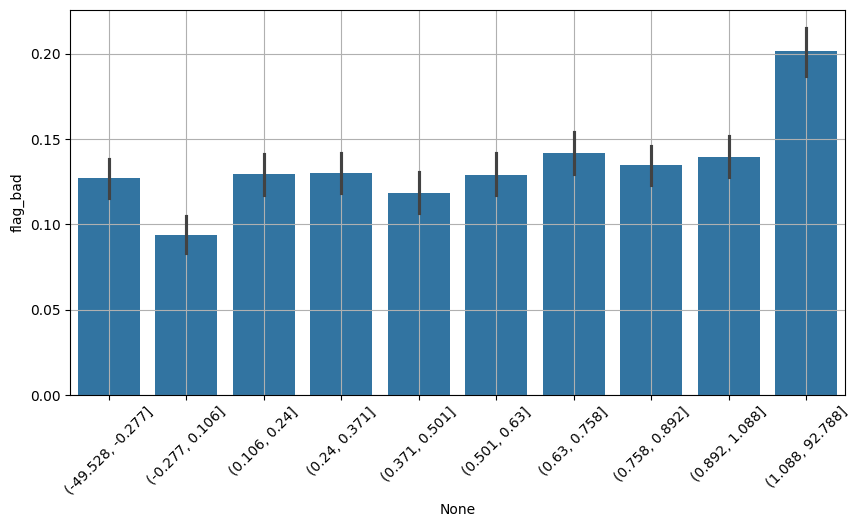

In [38]:
b = pd.qcut(a, q=10, duplicates="drop")
result = df.groupby(b)["flag_bad"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x=b, y=df.flag_bad)
plt.xticks(rotation=45)
plt.grid()

We see the anomaly at the last bin. The bad percentage is higher.

This means people that falsify/differ their age more than 1.088 yr compared to fb_dob counted in joined date, tends to have more flag_bad percentage.

But why it doesn't happen in another direction (e.g the -0.277 to -49.5 bin)? See again the definition. the positive means fb_age higher than de_age. It can mean a young person pretend to be an adult/older person.

```
(((pd.to_datetime(df.de_date_joined, dayfirst=True) - pd.to_datetime(df.fb_dob))/pd.Timedelta(days=1))/365)-df.de_age
```

But if negative? It can mean an older person misfill the age in FB or any misfill case in FB. Its unintentional.

To exemplify, it looks like this. See who born at 1914?

In [39]:
df[(a>3.088)][['de_age', 'de_date_joined', 'fb_dob']]

,de_age,de_date_joined,fb_dob
83,34,02/01/2018 21:08,03/26/1914
108,33,12/01/2018 02:20,11/29/1945
113,23,03/01/2018 12:45,01/01/1905
132,26,06/01/2018 00:53,04/08/1928
157,37,03/01/2018 13:51,01/03/1945
...,...,...,...
40770,30,09/07/2018 17:54,05/17/1910
40816,25,11/07/2018 20:10,11/23/1945
40832,21,10/07/2018 19:13,11/19/1993
40990,37,11/07/2018 22:58,06/18/1978


In [40]:
df[(a>1.088)].flag_bad.mean()

np.float64(0.20121173469387754)

We also inspect if no age attached in fb means more bad percentage. Turns out same more or less.

In [41]:
df[a.isna()].flag_bad.mean()

np.float64(0.11405780586346213)

But let xgboost handle this issue as they can automate the binning by growing the tree. We just provide the feature.

### Age

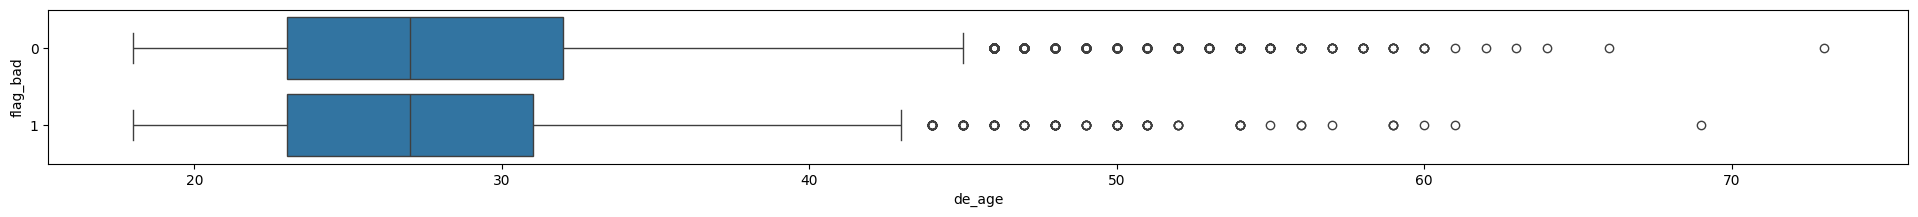

In [42]:
fig, ax = plt.subplots(figsize=(24,2))
sns.boxplot(df[['de_age', 'flag_bad']], x='de_age', y='flag_bad', orient='h');

Assume according to this the valid age are between 18-60

https://kredivo.id/en/persyaratan-daftar-kredivo.html

Actually i wanna assign the age > 60 to 60, but just hand it over to xgboost maybe this can be something to inspect

In [43]:
# df["de_age"] = df["de_age"].clip(upper=60)

In [44]:
df.de_age.describe()

count    41022.000000
mean        28.170908
std          6.537795
min         18.000000
25%         23.000000
50%         27.000000
75%         32.000000
max         73.000000
Name: de_age, dtype: float64

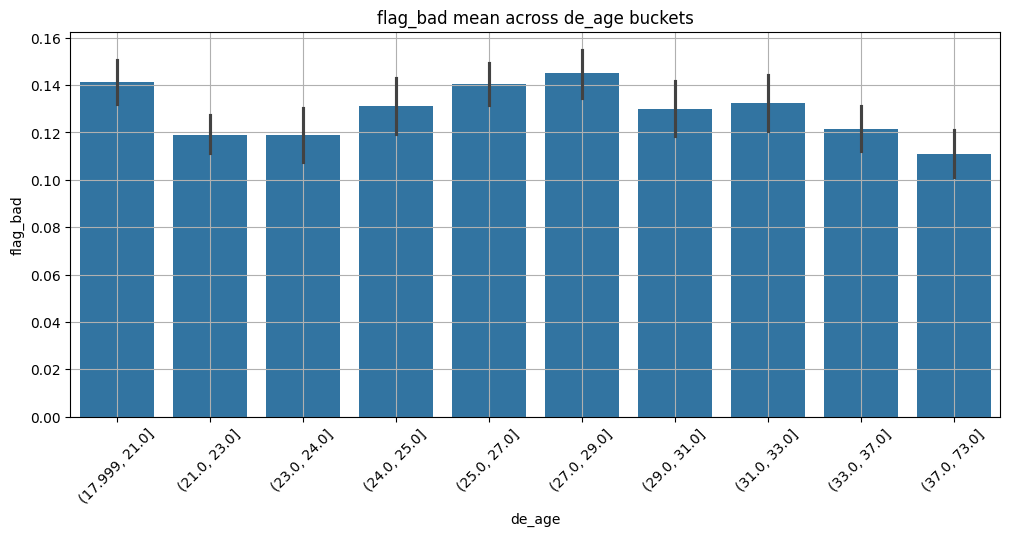

In [45]:
b = pd.qcut(df["de_age"], q=10, duplicates="drop")

plt.figure(figsize=(12,5))
sns.barplot(x=b, y=df["flag_bad"], estimator=lambda x: x.mean())
plt.xticks(rotation=45)
plt.title("flag_bad mean across de_age buckets")
plt.grid()

Not much difference. Ok to proceed

### Call log stats

We will handle this in the modelling part. Basically we will do feature engineering to extract those json data

### Other Device Info

Basically the same, we do Feature Engineering, but this time we try to find an external dataset and extract much more data like phone price, ram, dual sim, status, etc.

### App Info

We do FE also, it will be more on the modelling notebook. This one is interesting as we can extract keywords like, judol, zeus, patch, mod etc and assign the existing keyword as a flag. We will have several category to track it more.

### Fb Relation

In [46]:
df.fb_relation.value_counts(dropna=False)

fb_relation
NaN                                    26461
Married                                 6327
Single                                  4495
In a relationship                       1847
Engaged                                  812
It's complicated                         362
In an open relationship                  158
Married (Pending)                        154
In a domestic partnership                118
Separated                                110
Divorced                                  59
Widowed                                   57
In a relationship (Pending)               28
Engaged (Pending)                         22
In a civil union                           5
In an open relationship (Pending)          3
In a domestic partnership (Pending)        3
It's complicated (Pending)                 1
Name: count, dtype: int64

In the next notebook instead of throwing this feature since more than 60% null, we will assign NaN to unstated so model can also learn it. And we will assign similiar-to-married status to married

### Last Update Date

We will Feature Engineering this by substracting it to date joined, and put the difference numbers on the model

### From Gsmarena

Walkthrough to the cleaned gsmarena dataset. Should be more but this is one i wanna know the pattern more to decide a practical next step.

In [47]:
import json

In [48]:
df_device = df["ph_other_device_info"].apply(json.loads).apply(pd.Series)
df = pd.concat([df, df_device], axis=1)
del df_device
df_mkt_gsm = pd.read_csv('marketing_gsm_clean.csv')
df = df.merge(df_mkt_gsm, how='left', on=['device_codename', 'brand'])

In [78]:
df['Retail Branding'].value_counts(dropna=False).to_dict()

{'Xiaomi': 13701,
 'Samsung': 8887,
 'Oppo': 7437,
 'Vivo': 2460,
 'Asus': 2416,
 'Lenovo': 1492,
 'Sony': 706,
 nan: 622,
 'Smartfren': 571,
 'LG': 539,
 'Infinix': 348,
 'Apple': 299,
 'Motorola': 251,
 'Huawei': 203,
 'Meizu': 142,
 'Nokia': 139,
 'Coolpad': 109,
 'Hisense': 97,
 'BlackBerry': 82,
 'Acer': 63,
 'Honor': 57,
 'HTC': 55,
 'ZTE': 52,
 'alcatel': 49,
 'Sharp': 46,
 'OnePlus': 44,
 'Fujitsu': 34,
 'Realme': 30,
 'Wiko': 17,
 'Haier': 12,
 'Blackview': 10,
 'Elevate': 10,
 'Evercoss': 8,
 'Lava': 6,
 'Nextbit': 4,
 'SPC': 3,
 'Google': 3,
 'Bluebird': 2,
 'HP': 2,
 'Micromax': 2,
 'Mito': 2,
 'Silent Circle': 2,
 'Nexian': 1,
 'LeTV': 1,
 'Mobistel': 1,
 'Yes': 1,
 'Vodafone': 1,
 'Kyocera': 1,
 'Leeco': 1,
 'Nuu': 1}

In [64]:
# df.groupby("Retail Branding")["flag_bad"].mean()
df['counts_retail_branding'] = df['Retail Branding'].map(df['Retail Branding'].value_counts(dropna=False).to_dict())

In [71]:
avg_flag = df.groupby("counts_retail_branding")["flag_bad"].mean().reset_index()

This is the composition. There are several that has high bad composition like sharp (46), smartfren (571) although the data is not few like the (1)s group

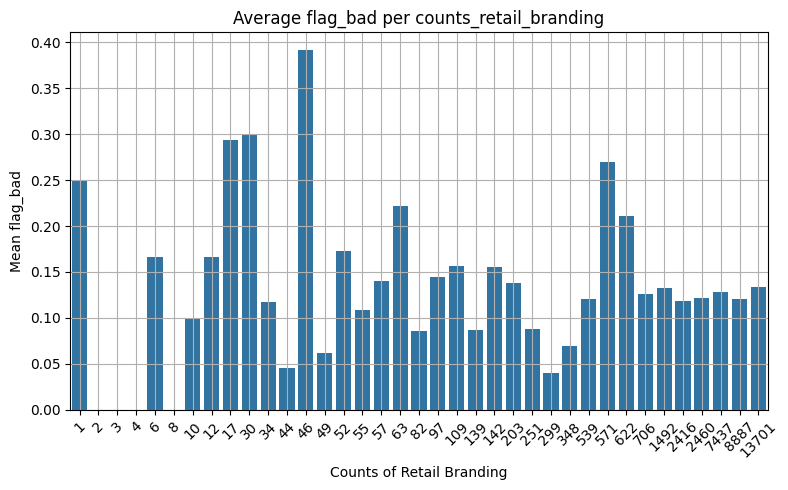

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(data=avg_flag, x="counts_retail_branding", y="flag_bad")

plt.title("Average flag_bad per counts_retail_branding")
plt.xlabel("Counts of Retail Branding")
plt.ylabel("Mean flag_bad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()

Before joined to the gsmarena dataset, device codename and brand is translated using google play support dataset. Not all having support, and some has been curated also for this column to match the gsmarena dataset later. But this is the bad composition relative to the value counts. For the 622 is for the nan. At least the value counts (~50) is lower than device_codename cardinality that reaches ~1000 and uncleaned brand column ~133.

In [81]:
df.brand.value_counts(dropna=False)

brand
Xiaomi           10008
samsung           8869
OPPO              7474
xiaomi            3756
vivo              2460
                 ...  
ICHERRY              1
Philips              1
EVERCOSS A7A*        1
IMO S90              1
O3                   1
Name: count, Length: 133, dtype: int64